In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# main ones to focus on for this sprint
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Covered in sprint 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Covered in sprint 4
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Neural Network!!
from sklearn.neural_network import MLPClassifier


# Get the data

In [2]:
## read the data
mbti = pd.read_csv('../7_Data/mbti_1.csv')

## split the rows
all_mbti = []
for i, row in mbti.iterrows():
    for post in row['posts'].split('|||'):
        all_mbti.append([row['type'], post])
all_mbti = pd.DataFrame(all_mbti, columns=['type', 'post'])

## remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_mbti['post'] = all_mbti['post'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# make lower case
all_mbti['post'] = all_mbti['post'].str.lower()

#remove punctuation
import string
def remove_punctuation_numbers(post):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in post if l not in punc_numbers])
all_mbti['post'] = all_mbti['post'].apply(remove_punctuation_numbers)

In [3]:
all_mbti['I'] = all_mbti['type'].apply(lambda x: x[0] == 'I').astype('int')

In [4]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM', 
         'Naive Bayes', 'LDA', "QDA",          
         "Decision Tree", "Random Forest",  "AdaBoost", 
         "Neural Net"]

In [5]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),    
    GaussianNB(),    
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),    
    
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier(),
    
    MLPClassifier(alpha=1)    
]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vect = CountVectorizer(stop_words='english', min_df= .01)
X = vect.fit_transform(all_mbti['post'])

In [8]:
X.shape

(422845, 152)

In [9]:
y = all_mbti['I']

# Lets build ALL the classification models!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X[:10000].toarray(), y[:10000])

In [11]:
# assume everyone is introverted would give us this accuracy
np.mean(y_train)

0.78280000000000005

In [18]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):    
    print ('Fitting {:s} model...'.format(name))

    print ('... training')
    run_time = %timeit -o clf.fit(X_train, y_train)
    
    print ('... predicting')
    y_pred = clf.predict(X_train)   
    y_pred_test = clf.predict(X_test)
    
    print ('... scoring')
    accuracy = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred)
    recall = metrics.recall_score(y_train, y_pred)
    
    f1 = metrics.f1_score(y_train, y_pred)    
    f1_test = metrics.f1_score(y_test, y_pred_test)    
    
    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)
    
    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])

    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)



Fitting Logistic Regression model...
... training
35.5 ms ± 832 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
... predicting
... scoring
Fitting Nearest Neighbors model...
... training
196 ms ± 16.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
... predicting
... scoring
Fitting Linear SVM model...
... training
The slowest run took 1308.52 times longer than the fastest. This could mean that an intermediate result is being cached.
16min 2s ± 38min 57s per loop (mean ± std. dev. of 7 runs, 1 loop each)
... predicting
... scoring
Fitting RBF SVM model...
... training


C:\Users\User\Anaconda3\envs\edsa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


10.1 s ± 467 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
... predicting
... scoring
Fitting Naive Bayes model...
... training
17.9 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
... predicting
... scoring
Fitting LDA model...
... training
75.9 ms ± 2.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
... predicting
... scoring
Fitting QDA model...
... training
57.2 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
... predicting
... scoring
Fitting Decision Tree model...
... training
39.5 ms ± 4.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
... predicting
... scoring
Fitting Random Forest model...
... training
23.5 ms ± 4.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
... predicting
... scoring
Fitting AdaBoost model...
... training


C:\Users\User\Anaconda3\envs\edsa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


627 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
... predicting
... scoring
Fitting Neural Net model...
... training
1.01 s ± 95.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
... predicting
... scoring


C:\Users\User\Anaconda3\envs\edsa\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,0.939333,0.931073,0.996253,0.962561,0.869625,9.539685
Decision Tree,0.786133,0.788272,0.993698,0.879144,0.872040,0.036085
AdaBoost,0.784000,0.785647,0.995742,0.878305,0.871830,0.599703
Linear SVM,0.782800,0.782800,1.000000,0.878169,0.872858,5.110781
Random Forest,0.782800,0.782800,1.000000,0.878169,0.872858,0.019713
Neural Net,0.782800,0.782800,1.000000,0.878169,0.872858,0.862853
LDA,0.784000,0.787502,0.991654,0.877865,0.873092,0.071550
Logistic Regression,0.783200,0.785397,0.994890,0.877818,0.873099,0.033710
Nearest Neighbors,0.761067,0.845385,0.850281,0.847826,0.781562,0.156453


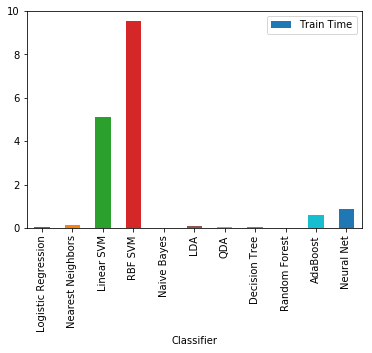

In [20]:
results.plot(y='Train Time', kind='bar')

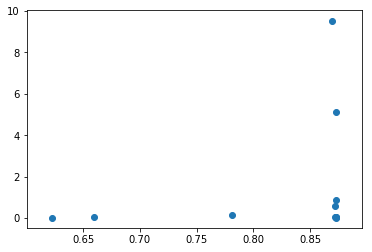

In [21]:
plt.scatter(x=results['F1 Test'], y=results['Train Time'])

In [14]:
confusion['Logistic Regression']

array([[  33, 1596],
       [  30, 5841]], dtype=int64)

In [15]:
confusion['RBF SVM']

array([[1196,  433],
       [  22, 5849]], dtype=int64)

# [K_Folds Cross Validation](https://www.analyticsvidhya.com/blog/2015/11/improve-model-performance-cross-validation-in-python-r/)

But how do we know if these models are robust?  Thats where K Folds cross validation comes in.  

In python, [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html) is easily implemented in SKLearn

In [16]:
from sklearn.model_selection import cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=10)
    print(name)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Logistic Regression
Accuracy: 0.77 (+/- 0.00)


MemoryError: 

In [ ]:
help(cross_val_score)

In [ ]:
from sklearn import cross_validation
model = RandomForestClassifier(n_estimators=100)
cv = cross_validation.KFold(len(X_train), n_folds=10, indices=False)
results = []
# "Error_function" can be replaced by the error function of your analysis
for traincv, testcv in cv:
    probas = model.fit(train[traincv], target[traincv]).predict_proba(train[testcv])
    results.append(  )

# Illustration on dummy data

In [ ]:
h = .02  # step size in the mesh

In [ ]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [ ]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable,            
            ]

In [ ]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()